# 5. Tutorial 3: Epidemiology model

#### Naoki TANI
#### Center for Advanced Policy Studies (CAPS), Institute of Economic Research, Kyoto University
#### April 18, 2024

In [10]:
import numpy as np
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

## 1. Simple SIR model

#### There is a continuum of agents of mass $N$. Each agent can be either "Susceptible" ($S$), "Infected" ($I$) or "Recovered" ($R$).
#### $S_t$ represents the number of people at time $t$ who are susceptible to the disease infection. 
#### $I_t$ is the number of infected agents at time $t$ who recover with probability $\gamma$ and die with probability $\delta$.
#### $R_t$ is the number of agents at time $t$ who recovered from the infected state.
#### In each period, one agent meets another agent drawn randomly. If Susceptible agents meet an Infected agent, they always catch the disease. $\beta$ is the rate at which agents are exposed to infected people. For sake of simplicity, Recovered agents never get infected with the disease even when they meet Infected agents.

#### The model can be writen as:

$S_{t} = S_{t-1} - \frac{\beta S_{t-1}I_{t-1}}{N_{t}}$

$I_{t} = I_{t-1} + \frac{\beta S_{t-1}I_{t-1}}{N_{t}} - \delta I_{t-1} - \gamma I_{t-1}$

$R_{t} =  R_{t-1} + \gamma I_{t-1}$

$ N_{t} = S_{t} + I_{t} + R_{t}$ 

In [11]:
class Parameters:
    def __init__(self, β1, δ, γ, T):
        self.β1 = β1 #infection rate
        self.δ = δ #death rate
        self.γ = γ #recovery rate
        self.T = T #total periods
p = Parameters(0.2, 0.01, 0.014, 500)

In [12]:
# define the transition function
def f(s, p):
    S_t, I_t, R_t = s #initial state
    S_tt = S_t - p.β1 * S_t * I_t / (S_t + I_t + R_t)
    I_tt = I_t + p.β1 * S_t * I_t / (S_t + I_t + R_t) - p.δ * I_t - p.γ * I_t
    R_tt = R_t + p.γ * I_t
    return [S_tt, I_tt, R_tt]

In [13]:
f([10.0, 5.0, 5.0],p) 

[9.5, 5.38, 5.07]

In [14]:
# simulate the transitions over T periods
def simulate(v0, f, p):
    sim = [v0]
    for t in range(1, p.T):
        v1 = f(sim[-1], p)
        sim.append(v1)
    return np.array(sim).T #creat a matrix from a vector of vectors

In [15]:
v0 = [10.0, 2.0, 0.0] #initial state
sim1 = simulate(v0, f, p)
sim1

array([[1.00000000e+01, 9.66666667e+00, 9.29785940e+00, ...,
        1.23772305e-04, 1.23771986e-04, 1.23771674e-04],
       [2.00000000e+00, 2.28533333e+00, 2.59929260e+00, ...,
        9.02574426e-05, 8.80915831e-05, 8.59776967e-05],
       [0.00000000e+00, 2.80000000e-02, 5.99946667e-02, ...,
        6.99987515e+00, 6.99987641e+00, 6.99987765e+00]])

In [16]:
sim1[0,1:10]

array([9.66666667, 9.2978594 , 8.89361819, 8.45514471, 7.98498861,
       7.48716175, 6.96714468, 6.43175639, 5.88887501])

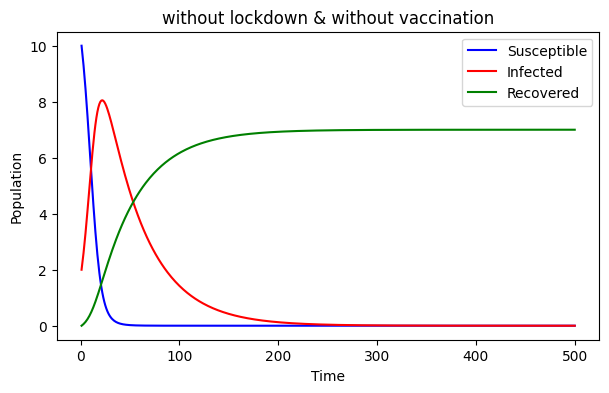

In [17]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, p.T+1), sim1[0], label='Susceptible', color='blue')
plt.plot(range(1, p.T+1), sim1[1], label='Infected', color='red')
plt.plot(range(1, p.T+1), sim1[2], label='Recovered', color='green')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('without lockdown & without vaccination')
plt.legend(loc='upper right')
plt.show()

## 2. Exercises

#### $\mathit{Q}$-1. Simulate the transition of the scenario that the government implements lockdown to reduce the infection rate.

#### $\mathit{Q}$-2. Plot the transtion of new cases in both scenarios (with lockdown and without lockdown).

#### $\mathit{Q}$-3. Plot the variation of transtions of new cases depending on $\beta$.